In [2]:
import numpy as np
import interferometer as itf
from matplotlib import pyplot as plt
from qiskit.visualization import plot_histogram
from Aquinas.numeric_truncated_unitaries import *
from Aquinas.direct_decomposition import *
from Aquinas.boson_sampling_probabilities import *
from Aquinas.simulation import *
from qiskit.quantum_info import Operator
from scipy import optimize

In [3]:
num_modes = 2
num_photons = 1
U = random_unitary(num_modes)
circuit = direct_decomposition(U, num_photons)
print(circuit.depth())
print(circuit.num_qubits)

5
2


In [7]:
num_modes = 2
num_photons = 16
U = random_unitary(num_modes)
circuit = direct_decomposition(U, num_photons)
print(circuit.depth())
print(circuit.num_qubits)

979973
10


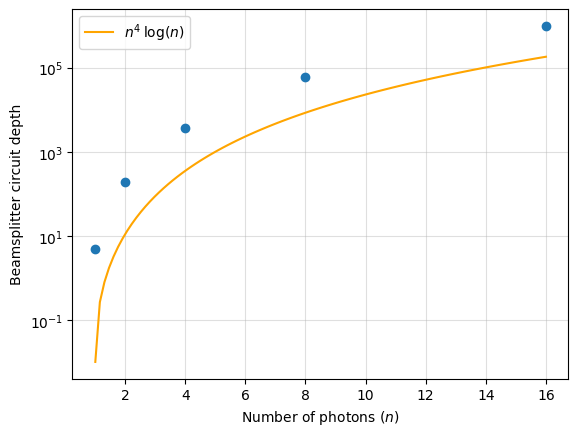

In [4]:
num_photons = [1,2,4,8,16]
circuit_depths = [5,197,3653,60677,979973]
# plt.loglog(num_photons, circuit_depths)
x = np.linspace(1.01,16,num=100)
x4 = x**4
x4log = x**4 * np.log(x)

plt.grid(which="both", alpha=0.4)
plt.scatter(num_photons, circuit_depths, zorder=2)
plt.plot(x, x4log, label='$n^4 \: \log(n)$', color="orange")
plt.yscale('log')
plt.xlabel("Number of photons ($n$)")
plt.ylabel("Beamsplitter circuit depth")
plt.legend()
plt.savefig(fname="plots/circuit_scaling.png", dpi=300, 
            format="png")